In [2]:
pwd

'/home/prabhakar/proj/Computing in Science 2: Spring 2019'

In [3]:
!ifconfig

eno1: flags=4099<UP,BROADCAST,MULTICAST>  mtu 1500
        ether c8:d9:d2:7b:7b:05  txqueuelen 1000  (Ethernet)
        RX packets 0  bytes 0 (0.0 B)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 0  bytes 0 (0.0 B)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

lo: flags=73<UP,LOOPBACK,RUNNING>  mtu 65536
        inet 127.0.0.1  netmask 255.0.0.0
        inet6 ::1  prefixlen 128  scopeid 0x10<host>
        loop  txqueuelen 1000  (Local Loopback)
        RX packets 150198  bytes 38035077 (38.0 MB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 150198  bytes 38035077 (38.0 MB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

wlo1: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet 192.168.2.8  netmask 255.255.255.0  broadcast 192.168.2.255
        inet6 fe80::3dcc:2ff0:3166:f92a  prefixlen 64  scopeid 0x20<link>
        ether 30:24:32:fb:c5:57  txqueuelen 1000  (Ethernet)
        RX pa

# Starting: quick review

## matplotlib function plot

1. generally speaking given two lists of real numbers same size, L1 and L2, then plot(L1,L2) will give poly-line connecting points in order they appear in L1 and L2. 
1.  plot( [x1,x2], [y1,y2] ) generates plot line joining (x1,y1) with (x2,y2)
1. plot( [x1,x2,x3], [y1,y2,y3] ): gives line connecting (x1,y1) with (x2,y2) AND a line joining (x2,y2) with (x3,y3) 

# Map:
Map is a mathematical construct that takes an object and returns another object of same type. Usually, the map is iterated multiple times to test for reaching a 'constant' value i.e. steady state

Example: the operation of a map $f$ may written as: <br>
  $x_1=f(x_0)$ <br>
where the map $f$ transform the input $x_0$ to its new value $x_1$.

# Logistical map
Logistic map is a quadratic map; i.e. $f(x)$ is a quadratic ploynomial. 
It shows a particularly interesting phenomena of 'deterministic chaos' i.e. a deterministic map showing apparently random behaviour.  Logistic map has a single parameter, named $\alpha$, and is given by: <br>
$f(x)=\alpha x(1-x)$<br>
When $0\le \alpha \le 4$, the map takes an input $0\le x \le 1$ to give an output in the same range. For a particular value of the parameter $\alpha$, we want to find the behaviour of the map. For such systems, plot of $x_{n}$ vs $x_{n+1}$ is called phase plot and is a important tool for visualising and analysing such systems. 

We will explore this in this tutorial using phase plots.

You can find good detail on Logistic Map at: https://en.wikipedia.org/wiki/Logistic_map


# Task-1
Write a function that will take as input the following: 
1. parameter value $\alpha$
1. starting value for $x$
1. number of iterations to run

Tasks:
1. Task is to plot the $n$ vs. $x_n$, where $x_n=f(x_{n-1})$ and $x_0=x$.
1. For a fixed $\alpha$ and do the above plot for various $0\le x_0 \le 1$. 
1. Repeat above steps for the following values of $\alpha$: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.5
1. Comment

<IPython.core.display.Javascript object>


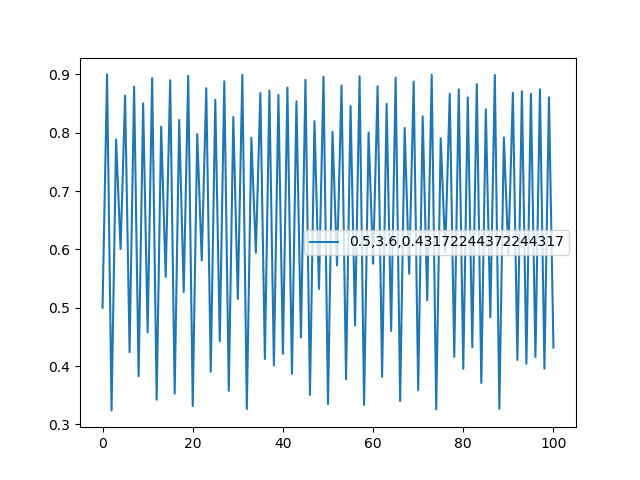

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
def solver(prevx,a):
    return a*prevx*(1-prevx)
    
def func(alpha , x , n) :
    yaxis = [x]
    for i in range(n):
        yaxis = np.append(yaxis,solver(yaxis[-1],alpha))
    #print(yaxis)
    plt.plot(range(yaxis.size),yaxis,label=str(x)+','+str(alpha)+','+str(yaxis[-1]))
    plt.legend()
    return
#for i  in range(2,10,2):
func(3.6,5/10,100)
plt.show()

    
    
    

In [116]:
def newfun(a):
    xaxis=np.arange(0,1,0.01)
    yaxis=[]
    yaxis2=[]
    
    for i in xaxis:
        yaxis=np.append(yaxis,a*i*(1-i))
        yaxis2=np.append(yaxis2,solver(solver(i,a),a))
    plt.plot(xaxis,yaxis)
    plt.plot([0,1],[0,1])
    plt.plot(xaxis,yaxis2)
    plt.show()
newfun(3.7)

<IPython.core.display.Javascript object>


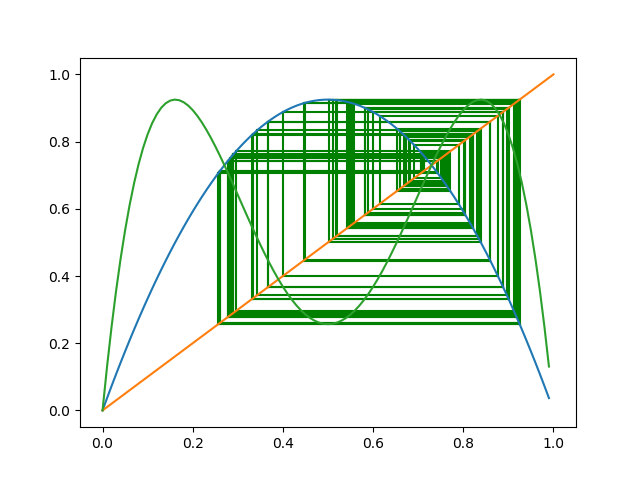

Data for x:0.7967541837426683 Alpha : 3.7
0.7578877920510337


In [115]:
def phase(alpha , x , n) :
    yaxis = [x]
    temp = x
    for i in range(n):
        #yaxis = np.append(yaxis,solver(yaxis[-1],alpha))
        plt.plot([temp,solver(temp,alpha)],[solver(temp,alpha),solver(temp,alpha)],'g')
        temp=solver(temp,alpha)
        plt.plot([temp,temp],[temp,solver(temp,alpha)],'g')
        
    xaxis = [x]
    xaxis = np.append(xaxis,yaxis[:-1])
    #print(yaxis)
    #plt.plot(xaxis,yaxis,'.',label=str(x)+','+str(alpha)+','+str(yaxis[-1]))
    #label=str(x)+','+str(alpha)+','+str(yaxis[-1])
    #plt.legend()
    print("Data for x:" + str(x) + " Alpha : " + str(alpha))
    #print(xaxis)
    #print(yaxis)
    print(temp)
#for i  in range(2,10,2):
phase(3.7,0.7967541837426683,100)

plt.show()

HomeWork:
1) $\alpha$ vs $x*$
2) $x_i$ vs $i$
3) $\Delta / \epsilon$

# Task-2

Write a function that will take values for $x$, $\alpha$ and the number of steps and plot the Phase Plot for these steps.

# Task-3
Write a function, for a particular value of $\alpha$, to determine steady states and cycles (lets denote these values as $x^*(\alpha)$.<br>
HINT-1: consider $f(x)$, $f(f(x))=f^2(x)$, $f^3(x)$,...,$f^n(x)$<br>
HINT-2: You might want to use the function *isclose* defined below:
~~~python
def isclose(a,b,delta):
''' if the difference between a and b
    is less than delta, then returns True.
    Else returns False'''
    return fabs(a-b) < delta
~~~

# Task-4
Plot $\alpha$ vs $x^*(\alpha)$. Comment.

# Task-5
Find the ratio between two consequtive bifurcations.